# Pymaceuticals Inc.
---

### Analysis
* Your analysis here ...

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on = 'Mouse ID', how = 'right')
# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [2]:
# Checking the number of mice.
unique_mice = merge_df['Mouse ID'].unique()
print(f"There are {len(unique_mice)} mice.")


There are 249 mice.


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
merge_df.duplicated(subset = ['Mouse ID', 'Timepoint'])
duplicate_mice = merge_df[merge_df.duplicated(subset = ['Mouse ID', 'Timepoint'])]
#duplicate_mice
duplicate_mouse = duplicate_mice['Mouse ID'].iloc[0]
duplicate_mouse
print(f"The duplicate mouse is {duplicate_mouse}")

The duplicate mouse is g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
merge_df.loc[merge_df['Mouse ID'] == duplicate_mouse]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = merge_df.loc[merge_df['Mouse ID'] != duplicate_mouse]
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
len(df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).mean()
median = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).median()
variance = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).var()
std = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).std()
sem = df['Tumor Volume (mm3)'].groupby(df['Drug Regimen']).sem()

summary = pd.DataFrame({"Mean Tumor Volume":mean, "Median Tumor Volume":median, "Tumor Volume Variance":variance, 
                       "Tumor Volume Std. Dev.":std, "Tumor Volume Std. Err.":sem})
summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summary2 = df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<AxesSubplot:xlabel='Drug Regimen', ylabel='Number of Unique Mice Tested'>

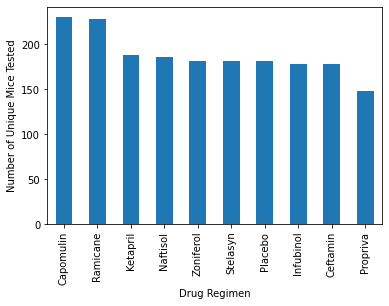

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
total_mice = df['Drug Regimen'].value_counts()
#total_mice
bar_pandas = total_mice.plot(kind = 'bar')
bar_pandas.set_xlabel("Drug Regimen")
bar_pandas.set_ylabel("Number of Unique Mice Tested")
bar_pandas


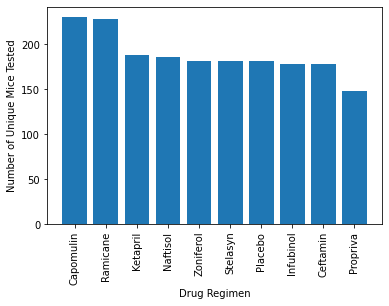

In [10]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
x_axis = total_mice.index.values
y_axis = total_mice.values
plt.bar(x_axis, y_axis,align = 'center')
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Unique Mice Tested")
plt.xticks(rotation = 'vertical')

plt.show()

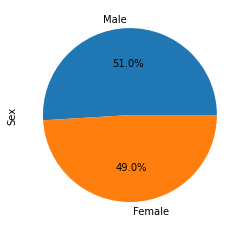

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = df['Sex'].value_counts()
gender
pie_pandas = gender.plot(kind = 'pie', autopct='%1.1f%%')


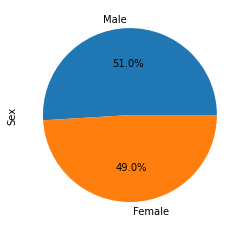

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender, labels = ['Male', 'Female'], autopct='%1.1f%%')
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin = df.loc[df['Drug Regimen'] == 'Capomulin']
ramicane = df.loc[df['Drug Regimen'] == 'Ramicane']
infubinol = df.loc[df['Drug Regimen'] == 'Infubinol']
ceftamin = df.loc[df['Drug Regimen'] == 'Ceftamin']

cap_max = capomulin.groupby('Mouse ID')['Timepoint'].max()
cap_df = pd.DataFrame(cap_max)
cap_final = pd.merge(cap_df, df, on = ['Mouse ID', 'Timepoint'])


ram_max = ramicane.groupby('Mouse ID').max()['Timepoint']
ram_df = pd.DataFrame(ram_max)
ram_final = pd.merge(ram_df, df, on = ['Mouse ID', 'Timepoint'])


inf_max = infubinol.groupby('Mouse ID').max()['Timepoint']
inf_df = pd.DataFrame(inf_max)
inf_final = pd.merge(inf_df, df, on = ['Mouse ID', 'Timepoint'])


cef_max = ceftamin.groupby('Mouse ID').max()['Timepoint']
cef_df = pd.DataFrame(cef_max)
cef_final = pd.merge(cef_df, df, on = ['Mouse ID', 'Timepoint'])

df_final = pd.concat([cap_final, ram_final, inf_final, cef_final])
df_final


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,0,Ceftamin,Male,23,28,45.000000,0
21,x581,45,Ceftamin,Female,19,28,64.634949,3
22,x822,45,Ceftamin,Male,3,29,61.386660,3
23,y769,45,Ceftamin,Female,6,27,68.594745,4


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    drug_df = df_final.loc[df_final['Drug Regimen'] == drug]
    tumor_volume  = drug_df['Tumor Volume (mm3)']
    tumor_vol_list.append(tumor_volume)
    # add subset 
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f"{drug}'s potential outliers: {lower_bound}       {upper_bound}")
    #print(tumor_volume)

Capomulin's potential outliers: 20.70456164999999       51.83201549
Ramicane's potential outliers: 17.912664470000003       54.30681135
Infubinol's potential outliers: 36.83290494999999       82.74144559000001
Ceftamin's potential outliers: 25.355449580000002       87.66645829999999


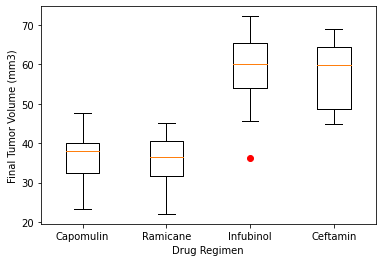

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.boxplot(tumor_vol_list, labels = treatment_list, widths = 0.4, vert = True, sym= 'r')
plt.show()

## Line and Scatter Plots

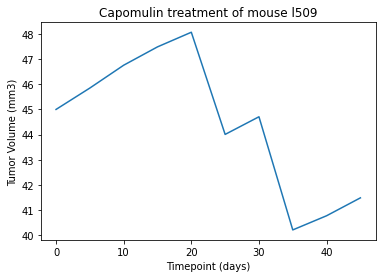

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#using mouse l509 like in example
cap_mouse = capomulin.loc[capomulin['Mouse ID']=="l509"]
cap_mouse
x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")
plt.show()

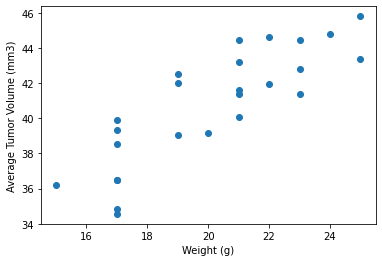

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg_vol = capomulin.groupby('Mouse ID').mean()
avg_vol

plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
correlation
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {round(correlation[0], 2)}")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.84


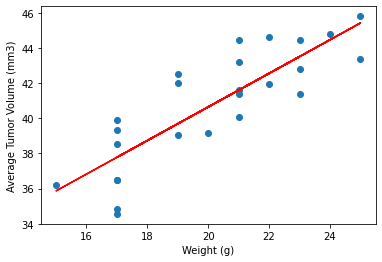

In [23]:
#making linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
regress_values = avg_vol['Weight (g)']*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_vol['Weight (g)'], avg_vol['Tumor Volume (mm3)'])
plt.plot(avg_vol['Weight (g)'], regress_values, 'r-')
plt.annotate(line_eq, (6,10), fontsize = 15, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()